In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import applications
from itertools import chain
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# (X-min)/(max-min) --> MinMax Scaling
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model1 = load_model('model/model.h5')

In [7]:
cifar10_dic = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

In [8]:
def cifar_predict(x):
    x1 = X_test[x]
    y = y_test[x]
    x2 = x1.reshape(-1,32,32,3)
    answer = np.argmax(model.predict(x2))
    print(f'예측한 그림은 {cifar10_dic[answer]} 입니다')
    print(f'정답은 {cifar10_dic[np.argmax(y)]} 입니다')
    if cifar10_dic[answer] == cifar10_dic[np.argmax(y)]:
        print('예측 성공!')
    else:
        print('예측 실패..')
    plt.imshow(x1)
    plt.show()

In [14]:
input_shape = X_train.shape[1:] # (28, 28)
output_shape = y_train.shape[1] # 10

In [21]:
model_dense = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(output_shape, activation='softmax')
    ]
)

In [23]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = 'accuracy'
model_dense.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

In [24]:
model_dense.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 1.7051 - accuracy: 0.3994 - val_loss: 1.7740 - val_accuracy: 0.3766
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5368 - accuracy: 0.4581 - val_loss: 1.9061 - val_accuracy: 0.3639
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.4787 - accuracy: 0.4787 - val_loss: 3.1799 - val_accuracy: 0.2365
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.4319 - accuracy: 0.4949 - val_loss: 1.6726 - val_accuracy: 0.4233
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3959 - accuracy: 0.5069 - val_loss: 1.5613 - val_accuracy: 0.4554
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3631 - accuracy: 0.5179 - val_loss: 1.6462 - val_accuracy: 0.4266
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3369 - accuracy: 0.5264 - val_loss: 1.8212 - val_accuracy: 0.3881
Epoch 

In [36]:
model_conv = Sequential(
    [
        Conv2D(10,(3,3),activation='relu',input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Conv2D(36,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(output_shape,activation='softmax')
    ]
)

In [37]:
model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 10)        280       
                                                                 
 batch_normalization_2 (Bat  (None, 30, 30, 10)        40        
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 36)          3276      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 36)          0         
 g2D)                                                            
                                                      

In [38]:
model_conv.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model_conv.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4028 - accuracy: 0.5000 - val_loss: 1.3766 - val_accuracy: 0.5067
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0933 - accuracy: 0.6152 - val_loss: 1.2892 - val_accuracy: 0.5606
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9632 - accuracy: 0.6647 - val_loss: 1.0699 - val_accuracy: 0.6256
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8744 - accuracy: 0.6958 - val_loss: 1.1110 - val_accuracy: 0.6278
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8087 - accuracy: 0.7183 - val_loss: 1.1819 - val_accuracy: 0.6205
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7486 - accuracy: 0.7417 - val_loss: 1.0263 - val_accuracy: 0.6608
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7011 - accuracy: 0.7565 - val_loss: 1.4309 - val_accuracy:

In [45]:
def cifar_predict(x):
    x1 = X_test[x]
    y = y_test[x]
    x2 = x1.reshape(-1,32,32,3)
    answer = np.argmax(model_conv.predict(x2))
    print(f'예측한 그림은 {cifar10_dic[answer]} 입니다')
    print(f'정답은 {cifar10_dic[np.argmax(y)]} 입니다')
    if cifar10_dic[answer] == cifar10_dic[np.argmax(y)]:
        print('예측 성공!')
    else:
        print('예측 실패..')
    plt.imshow(x1)
    plt.show()

1/1 [==============================] - 0s 17ms/step
예측한 그림은 truck 입니다
정답은 truck 입니다
예측 성공!


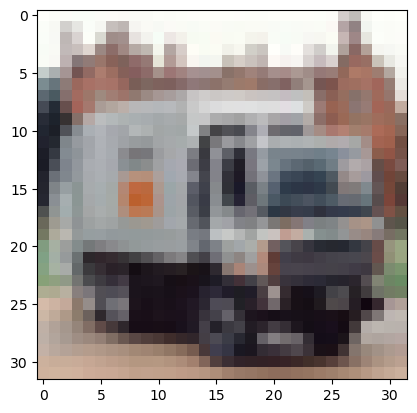

In [58]:
cifar_predict(11)

In [59]:
from glob import glob

In [114]:
dog_list = glob('C:/Users/user/Downloads/data/train/dog*.*')[:500]
cat_list = glob('C:/Users/user/Downloads/data/train/cat*.*')[:500]

In [110]:
dt = plt.imread(cat_list[0])

In [81]:
# 데이터 크기가 각각 다 달라서 통일 시켜야함
for i in cat_list[:10]:
    print(plt.imread(i).shape)

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(149, 150, 3)
(359, 431, 3)
(374, 500, 3)
(471, 499, 3)
(375, 499, 3)
(239, 320, 3)


In [83]:
import cv2 as cv

(150, 150, 3)


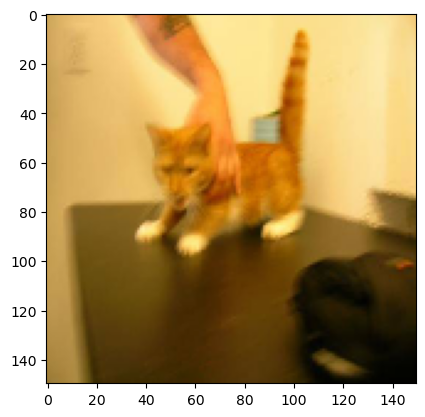

In [84]:
dt1 = cv.resize(dt,(150,150))
print(dt1.shape)
plt.imshow(dt1)

In [108]:
data = glob('C:/Users/user/Downloads/data/train/*.*')

In [86]:
for i in data:
    if plt.imread(i).shape[-1] != 3:
        print(plt.imread(i).shape[-1])

In [91]:
tmp = cv.resize(cv.imread(dog_list[0]),(150,150)).reshape(-1,150,150,3)
x = np.concatenate([tmp, np.random.randn(1,150,150,3)])
x.shape

(2, 150, 150, 3)

In [94]:
import time
st = time.time()
tmp = cv.resize(cv.imread(dog_list[0]),(150,150)).reshape(-1,150,150,3)
for i in dog_list[1:]:
    dt = np.concatenate([tmp, cv.resize(cv.imread(i),(150,150)).reshape(-1,150,150,3)])
ed = time.time()
elapse = ed - st
elapse

0.6337308883666992

In [97]:
dt = np.zeros((500,150,150,3))
st = time.time()
for idx, val in enumerate(dog_list):
    dt[idx] = cv.resize(cv.imread(val),(150,150)).reshape(-1,150,150,3)
ed = time.time()
elapse = ed - st
elapse

0.6771867275238037

In [98]:
dt.shape

(500, 150, 150, 3)

In [135]:
X = np.zeros((1000,150,150,3),dtype='int')
dog_list = glob('C:/Users/user/Downloads/data/train/dog*.*')[:500]
cat_list = glob('C:/Users/user/Downloads/data/train/cat*.*')[:500]
dog_list.extend(cat_list)
data = dog_list

In [136]:
y = []
for idx, val in enumerate(data):
    X[idx] = cv.resize(cv.imread(val),(150,150)).reshape(-1,150,150,3)
    if 'dog' in val:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

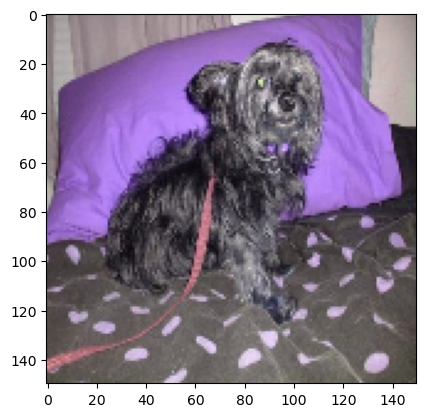

In [127]:
plt.imshow(X[0].astype('int'))

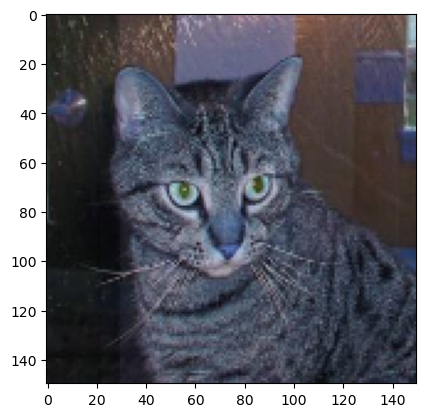

In [129]:
plt.imshow(X[501].astype('int'))

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [139]:
X = X / 255

In [148]:
model = Sequential(
    [
        Conv2D(32,(5,5), activation='relu',input_shape=(150,150,3)),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Conv2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(128,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(1,activation='sigmoid')
    ]
)

In [149]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 batch_normalization_7 (Bat  (None, 146, 146, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                      

In [150]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
model.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 7s 191ms/step - loss: 0.7983 - accuracy: 0.5880
Epoch 2/10
32/32 [==============================] - 6s 189ms/step - loss: 0.5753 - accuracy: 0.7020
Epoch 3/10
32/32 [==============================] - 6s 191ms/step - loss: 0.4400 - accuracy: 0.7830
Epoch 4/10
32/32 [==============================] - 6s 189ms/step - loss: 0.3139 - accuracy: 0.8790
Epoch 5/10
32/32 [==============================] - 6s 193ms/step - loss: 0.2384 - accuracy: 0.9120
Epoch 6/10
32/32 [==============================] - 6s 192ms/step - loss: 0.1619 - accuracy: 0.9460
Epoch 7/10
32/32 [==============================] - 6s 190ms/step - loss: 0.1077 - accuracy: 0.9700
Epoch 8/10
32/32 [==============================] - 6s 191ms/step - loss: 0.0952 - accuracy: 0.9710
Epoch 9/10
32/32 [==============================] - 6s 192ms/step - loss: 0.0664 - accuracy: 0.9850
Epoch 10/10
32/32 [==============================] - 6s 193ms/step - loss: 0.0647 - accuracy: 0.9820

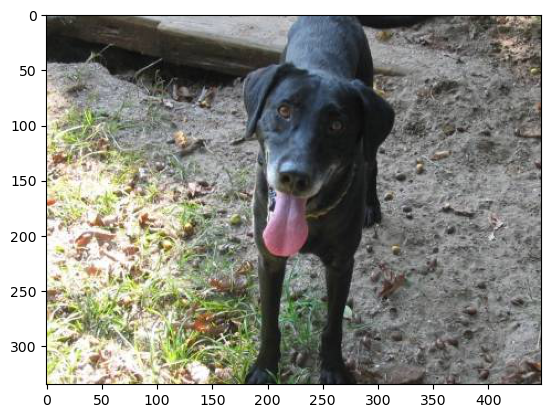

In [161]:
plt.imshow(plt.imread(data[123]))

In [169]:
def dog_cat_predict(x):
    result = model.predict(cv.resize(plt.imread(x),(150,150)).reshape(-1,150,150,3))
    result = np.where(result > 0.5, "고양이", "강아지")[0]
    print(result)
    plt.imshow(plt.imread(x))
    plt.show()

In [174]:
model.predict(cv.resize(plt.imread(data[99]),(150,150)).reshape(-1,150,150,3))

1/1 [==============================] - 0s 41ms/step


array([[1.]], dtype=float32)

In [175]:
samples = glob("C:/Users/user/Downloads/data/train/*.*")

In [176]:
test = np.random.choice(samples,10)

1/1 [==============================] - 0s 43ms/step
['강아지']


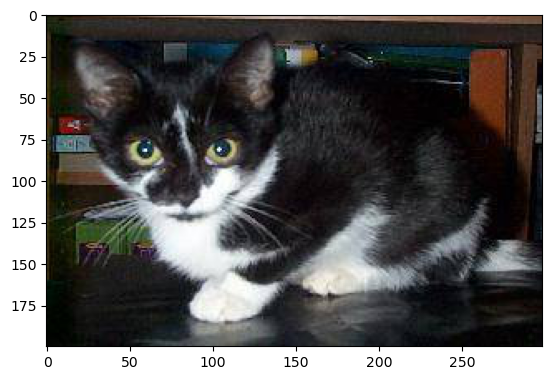

1/1 [==============================] - 0s 33ms/step
['고양이']


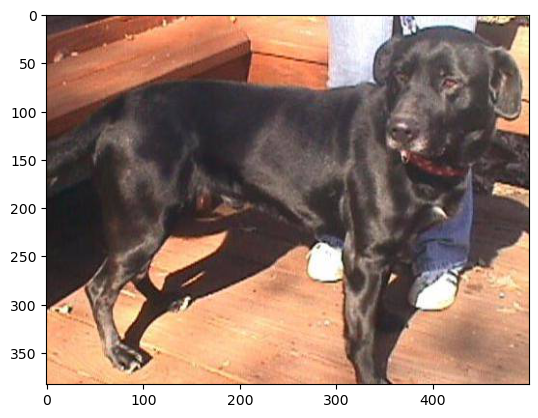

1/1 [==============================] - 0s 33ms/step
['고양이']


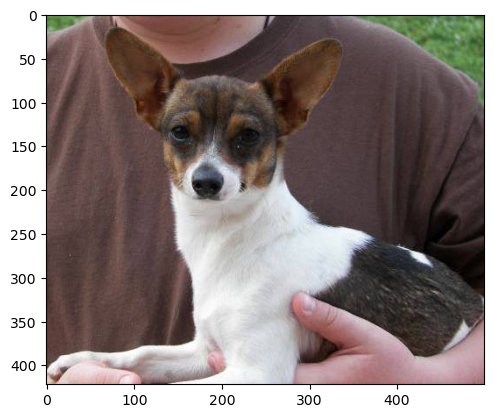

1/1 [==============================] - 0s 34ms/step
['고양이']


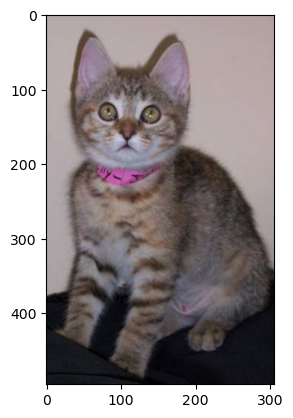

1/1 [==============================] - 0s 33ms/step
['강아지']


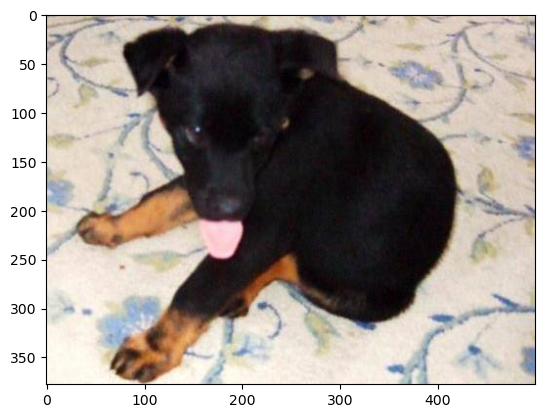

1/1 [==============================] - 0s 35ms/step
['고양이']


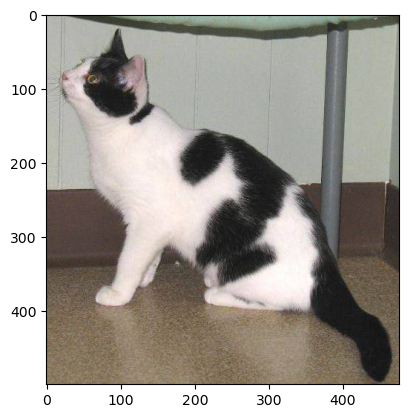

1/1 [==============================] - 0s 35ms/step
['고양이']


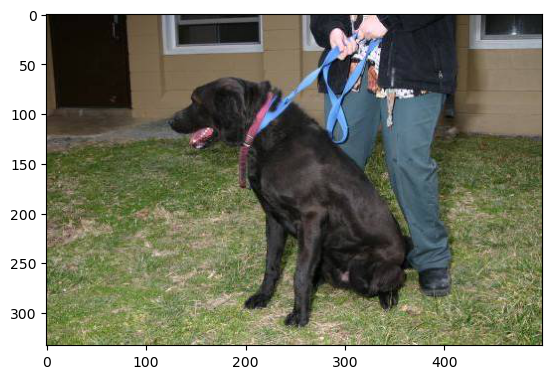

1/1 [==============================] - 0s 34ms/step
['고양이']


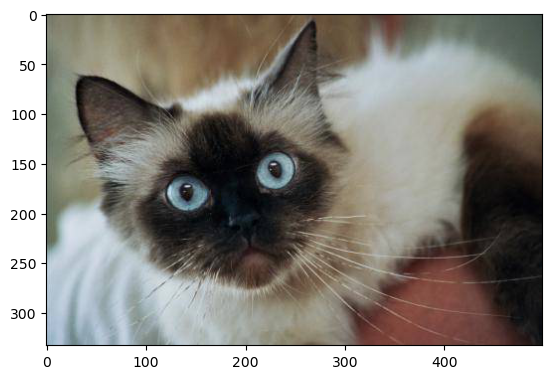

1/1 [==============================] - 0s 34ms/step
['고양이']


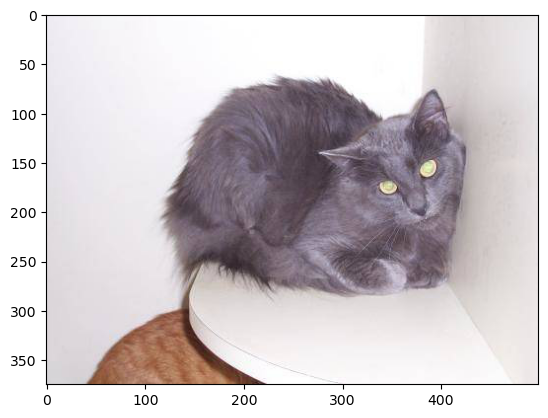

1/1 [==============================] - 0s 33ms/step
['고양이']


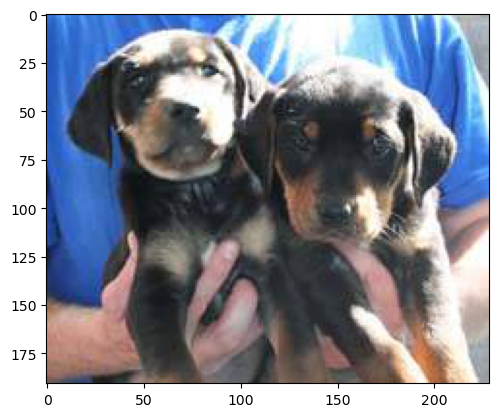

In [177]:
for i in test:
    dog_cat_predict(i)

In [178]:
X = np.zeros((25000,150,150,3),dtype='int')
dog_list = glob('C:/Users/user/Downloads/data/train/dog*.*')
cat_list = glob('C:/Users/user/Downloads/data/train/cat*.*')
dog_list.extend(cat_list)
data = dog_list

y = []
for idx, val in enumerate(data):
    X[idx] = cv.resize(cv.imread(val),(150,150)).reshape(-1,150,150,3)
    if 'dog' in val:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

In [179]:
model.evaluate(X,y)

782/782 [==============================] - 50s 63ms/step - loss: 94.9688 - accuracy: 0.5706


[94.9687728881836, 0.5705599784851074]

In [184]:
conv_base = VGG16(input_shape=(150,150,3),include_top=False)

58889256/58889256 [==============================] - 6s 0us/step


In [185]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [186]:
conv_base.predict(np.random.randn(1,150,150,3))

1/1 [==============================] - 0s 230ms/step


array([[[[0.        , 0.        , 0.30743322, ..., 0.        ,
          0.7491524 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.7318723 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.8582673 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.7036836 , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.63584185, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.7447032 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.0172366 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.99297154, 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.6982004 , 0.        ],
         [0.5859013 , 0.        , 0.34524047, ..., 0.        ,
          0.58905244, 0.        ],
         [0.4816

In [265]:
X_train = np.zeros((1000,150,150,3),dtype='int')
dog_list = glob('C:/Users/user/Downloads/data/train/dog*.*')[:500]
cat_list = glob('C:/Users/user/Downloads/data/train/cat*.*')[:500]
dog_list.extend(cat_list)
data = dog_list

y_train = []
for idx, val in enumerate(data):
    X_train[idx] = cv.resize(cv.imread(val),(150,150)).reshape(-1,150,150,3)
    if 'dog' in val:
        y_train.append(0)
    else:
        y_train.append(1)
y_train = np.array(y_train)

In [193]:
my_model = Sequential([
    Flatten(input_shape=(4,4,512)),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(32,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

In [194]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [195]:
X_train_trans = conv_base.predict(X_train)

32/32 [==============================] - 24s 747ms/step


In [196]:
my_model.fit(X_train_trans,y_train,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 6ms/step - loss: 0.2435 - accuracy: 0.9020
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0689 - accuracy: 0.9860
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0403 - accuracy: 0.9950
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9990
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0138 - accuracy: 0.9990
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9980
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 11/20
32/32 [

In [199]:
dt = plt.imread('C:/Users/user/Downloads/1.png')
dt = cv.resize(dt,(150,150))
dt = dt[:,:,:3]
dt = dt.reshape(1,150,150,3)
dt = conv_base.predict(dt)
np.where(my_model.predict(dt)>0.5,"고양이","강아지")

In [218]:
dt2 = plt.imread('C:/Users/user/Downloads/1.png')
dt2 = cv.resize(dt2,(150,150))
dt2 = dt2[:,:,:3]
dt2 = dt2.reshape(1,150,150,3)
dt2 = conv_base.predict(dt2)
np.where(my_model.predict(dt2)>0.5,"고양이","강아지")

In [228]:
dt3 = plt.imread('C:/Users/user/Downloads/3.png')
dt3 = cv.resize(dt3,(150,150))
dt3 = dt3[:,:,:3]
dt3 = dt3.reshape(1,150,150,3)
dt3 = conv_base.predict(dt3)
np.where(my_model.predict(dt3)>0.5,"고양이","강아지")

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model, to_categorical
from itertools import chain
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [21]:
dog_list = glob("C:/Users/user/Downloads/data/train/dog.*")
cat_list = glob("C:/Users/user/Downloads/data/train/cat.*")

In [22]:
data_list = list(chain(dog_list, cat_list))

In [23]:
y = []
for i in data_list:
    if 'dog' in i:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

In [24]:
X = np.zeros((25000,150,150,3))

In [25]:
for idx, file in enumerate(data_list):
    dt = plt.imread(file)
    dt = cv.resize(dt,(150,150)).reshape(1,150,150,-1)
    X[idx] = dt[:,:,:,:3]

In [26]:
np.save("data.npy",X)

In [27]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [32]:
conv_base = VGG16(input_shape=(150,150,3),include_top=False)

In [45]:
X_train_trans = conv_base.predict(X_train)
X_validation_trans = conv_base.predict(X_validation)

157/157 [==============================] - 105s 665ms/step


In [46]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [48]:
model = Sequential(
[
    Flatten(input_shape=X_train_trans.shape[1:]),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(X_train_trans, y_train, batch_size=64, epochs=20, validation_data=(X_validation_trans,y_validation))

Epoch 1/20


235/235 [==============================] - 6s 20ms/step - loss: 0.1457 - accuracy: 0.9411 - val_loss: 0.1212 - val_accuracy: 0.9508
Epoch 2/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0572 - accuracy: 0.9790 - val_loss: 0.1264 - val_accuracy: 0.9518
Epoch 3/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0309 - accuracy: 0.9888 - val_loss: 0.1473 - val_accuracy: 0.9536
Epoch 4/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.1900 - val_accuracy: 0.9486
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0216 - accuracy: 0.9917 - val_loss: 0.1907 - val_accuracy: 0.9492
Epoch 6/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.1810 - val_accuracy: 0.9564
Epoch 7/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.2212 - val_accuracy: 0.95

In [52]:
model.evaluate(conv_base.predict(X_test),y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9530


[0.23546352982521057, 0.953000009059906]

In [54]:
dt = plt.imread("C:/Users/user/Downloads/1.png")

In [57]:
def cat_dog(x):
    img = plt.imread(x)
    dt = cv.resize(img,(150,150)).reshape(1,150,150,-1)
    dt = dt[:,:,:,:3]
    result = np.where(model.predict(conv_base.predict(dt)) > 0.5, '고양이', '강아지')[0]
    print(result)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 20ms/step
['고양이']


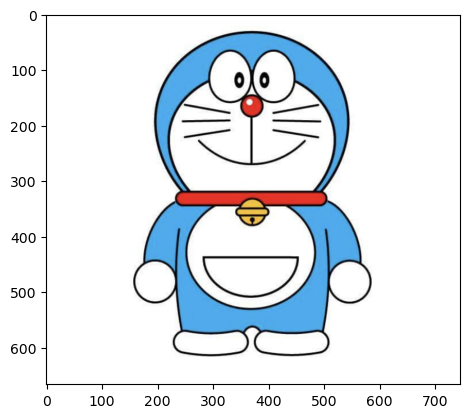

In [67]:
cat_dog("C:/Users/user/Downloads/7.png")

1/1 [==============================] - 0s 17ms/step
['강아지']


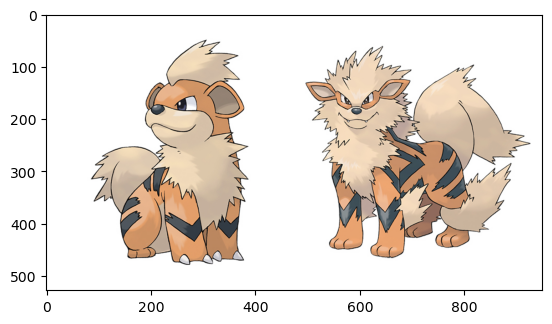

In [70]:
cat_dog("C:/Users/user/Downloads/8.jpg")

1/1 [==============================] - 0s 18ms/step
['고양이']


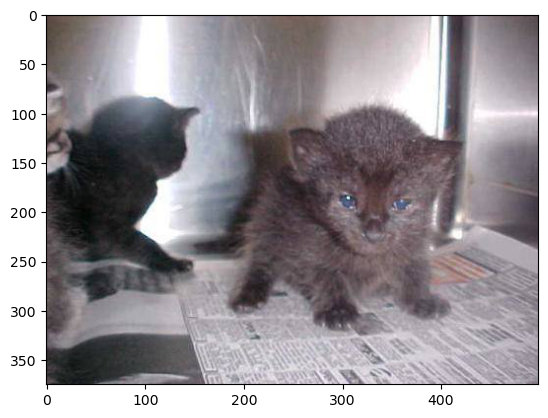

1/1 [==============================] - 0s 18ms/step
['강아지']


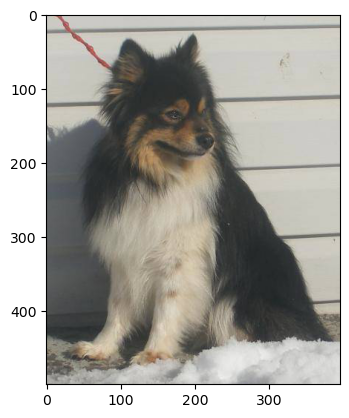

1/1 [==============================] - 0s 16ms/step
['강아지']


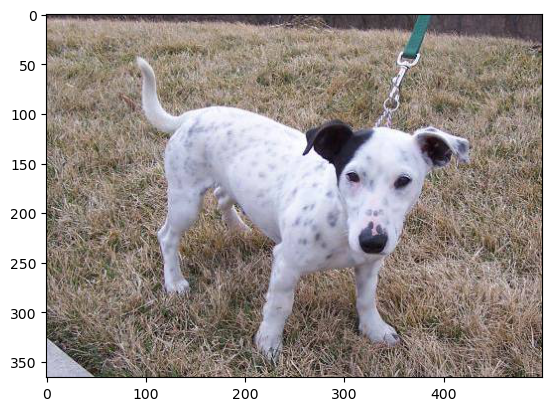

1/1 [==============================] - 0s 18ms/step
['강아지']


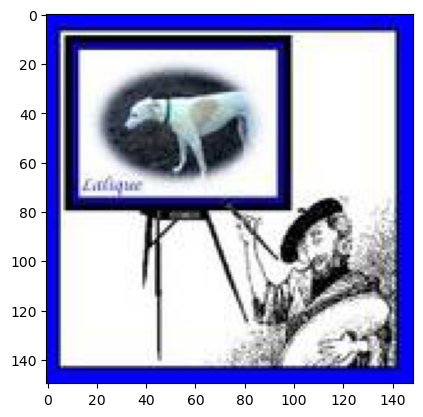

1/1 [==============================] - 0s 18ms/step
['고양이']


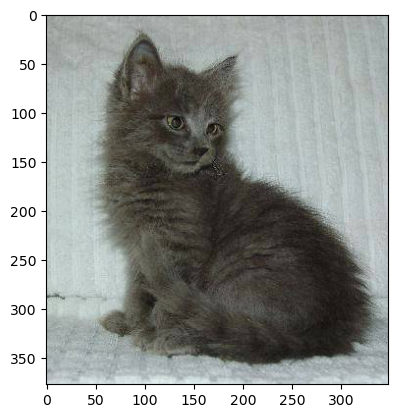

1/1 [==============================] - 0s 19ms/step
['고양이']


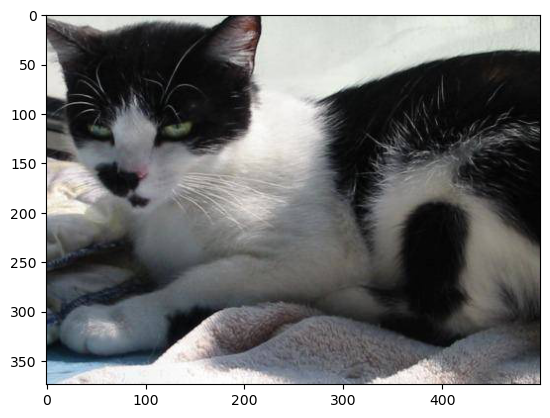

1/1 [==============================] - 0s 19ms/step
['고양이']


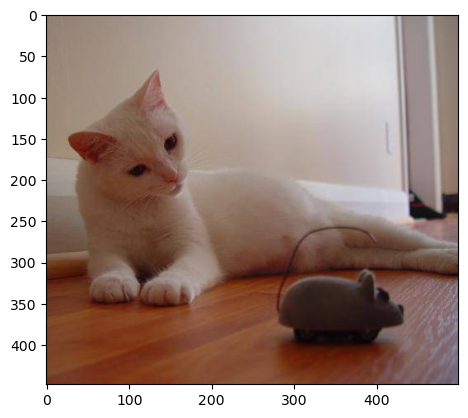

1/1 [==============================] - 0s 19ms/step
['강아지']


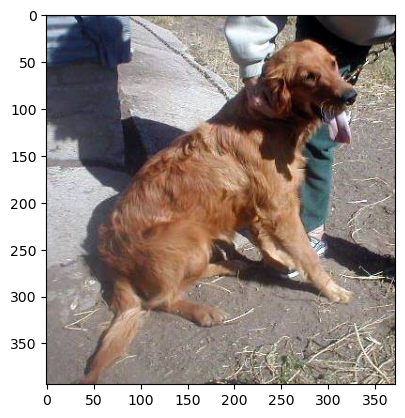

1/1 [==============================] - 0s 18ms/step
['고양이']


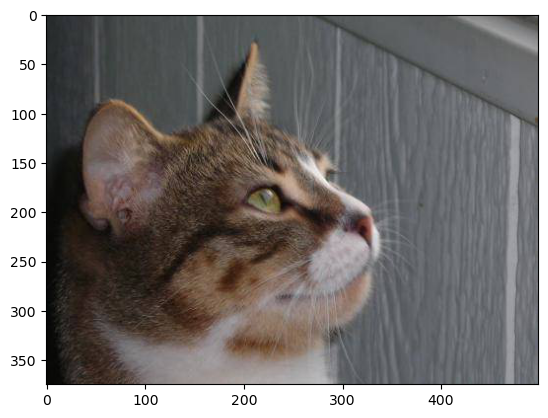

1/1 [==============================] - 0s 18ms/step
['고양이']


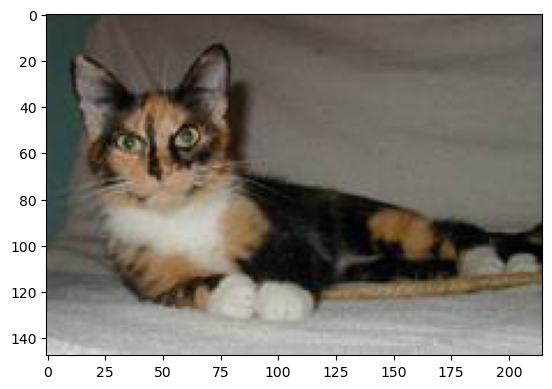

In [66]:
for i in np.random.choice(np.arange(25000),10):
    cat_dog(data_list[i])

In [78]:
np.dot(np.random.randn(1,150,150,3),conv_base.layers[1].weights[0].numpy()).shape

(1, 150, 150, 3, 3, 64)

In [94]:
from tensorflow.keras import Model

In [95]:
layers = []
for i in conv_base.layers:
    layers.append(i)

In [99]:
model.evaluate(conv_base.predict(X_test),y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9530


[0.23546352982521057, 0.953000009059906]

In [103]:
model.predict(np.random.randn(1,4,4,512))

1/1 [==============================] - 0s 22ms/step


array([[1.5705415e-10]], dtype=float32)

In [104]:
conv_base.layers[0]

In [109]:
tmp_model = Sequential()
for i in conv_base.layers:
    tmp_model.add(i)

In [114]:
tmp_model = Sequential()
tmp_model.add(conv_base.layers[0])

In [116]:
conv_base.layers[1].filters, conv_base.layers[1].kernel_size, conv_base.layers[1].activation

(64,
 (3, 3),
 <function keras.src.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>)

In [125]:
from tensorflow.keras.layers import Input

In [135]:
input_ = Input(shape=(150,150,3))
layer1 = Conv2D(64,(3,3),activation='relu')(input_)
layer2 = MaxPooling2D((2,2))(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(10,activation='relu')(layer3)
output_ = Dense(3, activation='softmax')(layer4)
model_test = Model(inputs=[input_],outputs=[output_])

In [130]:
model_test = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3))
])
model_test

In [141]:
model_test.predict(np.random.randn(2,150,150,3)).shape

1/1 [==============================] - 0s 21ms/step


(2, 3)

In [161]:
input_ = Input(shape=(150,150,3))
layer_ = input_
for layer in conv_base.layers[1:]:
    if 'conv' in repr(layer):
        activation = layer.activation
        strides = layer.strides
        kernel_size = layer.kernel_size
        filters = layer.filters
        padding = layer.padding
        layer_ = Conv2D(filters=filters, 
                        kernel_size=kernel_size, 
                        activation=activation, 
                        strides=strides, 
                        padding=padding)(layer_)
    elif 'pool' in repr(layer):
        pool_size = layer.pool_size
        strides = layer.strides
        padding = layer.padding
        layer_ = MaxPooling2D(pool_size=pool_size,
                              strides=strides,
                              padding=padding)(layer_)
layer_ = Flatten()(layer_)
layer_ = Dense(256,activation='relu')(layer_)
layer_ = Dense(128,activation='relu')(layer_)
layer_ = Dense(1,activation='sigmoid')(layer_)

model_test = Model(inputs=[input_],outputs=[layer_])

In [153]:
model_test.predict(np.random.randn(1,150,150,3))

1/1 [==============================] - 0s 58ms/step


array([[[[0.03891121, 0.        , 0.        , ..., 0.56624883,
          1.0391425 , 1.6606183 ],
         [0.        , 0.        , 0.07228398, ..., 0.0914498 ,
          0.861084  , 0.3134616 ],
         [0.97557217, 0.38743183, 0.5900284 , ..., 0.39681703,
          0.04514553, 0.7580282 ],
         ...,
         [0.        , 1.0917206 , 0.03111573, ..., 0.        ,
          0.02642733, 0.36211666],
         [0.        , 0.07053085, 0.28869876, ..., 0.23395425,
          0.        , 0.        ],
         [0.        , 0.07990788, 0.        , ..., 0.        ,
          0.        , 0.10955621]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.16980553, 0.2894375 ],
         [0.86971444, 0.00525708, 0.        , ..., 0.        ,
          0.        , 0.73166025],
         [0.70135   , 1.0542907 , 0.2752733 , ..., 0.        ,
          0.        , 0.37443748],
         ...,
         [0.        , 0.89740676, 0.        , ..., 0.        ,
          0.        , 0.8

In [162]:
model_test.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_22 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_24 (Conv2D)          (None, 75, 75, 128)       147584    
                                                           

In [165]:
len(model_test.layers)

23

In [166]:
len(conv_base.layers)

19

In [170]:
conv_base.layers[1].weights[1].shape

TensorShape([64])

In [171]:
model_test.predict(np.random.randn(3,150,150,3))

1/1 [==============================] - 0s 119ms/step


array([[0.50200224],
       [0.5017402 ],
       [0.50159883]], dtype=float32)

In [172]:
repr(conv_base.layers[1]).split(' ')[0].split('.')[-1]

'Conv2D'